# Read file and predict the spectral channels
#### variable_2d="Nd_max lwp"
#### variable_3d="pres ta hus clc"



## Variable input

# ICON-LES
### time 
#### time | float64
#### units: day as %Y%m%d.%f
#### calendar: proleptic_gregorian


In [7]:
import xarray as xr
path_icon_netCDF = "/work/bb1036/b381362/output/results_emulator/icon_germany_20130502_T10_lwp_Ndmax.nc"
ds = xr.open_dataset(path_icon_netCDF)
ds


<xarray.Dataset>
Dimensions:  (height: 150, lat: 627, lon: 589)
Coordinates:
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 147.0 148.0 149.0 150.0
  * lat      (lat) float64 47.61 47.62 47.63 47.64 ... 54.46 54.47 54.48 54.5
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables:
    pres     (height, lat, lon) float32 ...
    ta       (height, lat, lon) float32 ...
    hus      (height, lat, lon) float32 ...
    clc      (height, lat, lon) float32 ...
    lwp      (lat, lon) float32 ...
    Nd_max   (lat, lon) float64 ...
    time     datetime64[ns] ...
Attributes: (12/13)
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.4
    source:                    @
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    references:                see MPIM/DWD publications
    ...                        ...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 2.0.3 (https://...
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    rawdata:                   GLOBCOVER2009, HWSD, ASTER, Lake Database
    note:                      Landuse data look-up table: Asensio_2011
    uuidOfVGrid:               3be5ac35-92f4-4e91-7418-b62336222e20

# ICON-NWD 
### time 
#### time | float64
#### units: day as %Y%m%d.%f
#### calendar: proleptic_gregorian


In [15]:
import xarray as xr

base_path = "/scratch/b/b381150/2experiments_tempo/jessenia_2ndSimulation_purt_B767_20110401_case05_R2R13_icon_les_lim/remapped/"
icon_NWP_path =  f"{base_path}/NWP_LAM_DOM01_20110401T210000Z_0003.nc" 

ds = xr.open_dataset(icon_NWP_path)
ds



<xarray.Dataset>
Dimensions:      (time: 1, lon: 2668, lat: 1335, height: 150, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2011-04-01T21:00:00
  * lon          (lon) float64 -146.0 -146.0 -146.0 ... -138.0 -138.0 -138.0
  * lat          (lat) float64 26.0 26.0 26.01 26.01 ... 29.99 30.0 30.0 30.0
  * height       (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
Dimensions without coordinates: bnds
Data variables:
    height_bnds  (height, bnds) float64 ...
    temp         (time, height, lat, lon) float32 ...
    qv           (time, height, lat, lon) float32 ...
    pres         (time, height, lat, lon) float32 ...
    qnc          (time, height, lat, lon) float32 ...
    clc          (time, height, lat, lon) float32 ...
    tqc_dia      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    uuidOfVGrid:  67df8aa7-86ac-d389-8ca9-7326d4732700
    source:       git@gitlab.dkrz.de:leipzicon/icon.git@1664f57534c2d853e9ed6...
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    title:        ICON simulation
    history:      Thu Apr 25 11:21:04 2024: cdo remapdis,information.txt /scr...
    references:   see MPIM/DWD publications
    comment:      Sajedeh Marjani (b381150) on l30495 (Linux 4.18.0-425.10.1....
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

# Prepare the data to work with the Emulator


#### Variables ['ta', 'hus', 'pres', 'qnc', 'clc', 'clwvi']
#### Variable time or dimension

In [6]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from create_variables_emulator import read_get_1sample, get_save_lwp_Nd_max

# base_path = "/scratch/b/b381150/2experiments_tempo/jessenia_2ndSimulation_purt_B767_20110401_case05_R2R13_icon_les_lim/remapped/"
# path_icon_netCDF =  f"{base_path}/NWP_LAM_DOM01_20110401T210000Z_0003.nc" 
base_path="/work/bb1036/rttov_share/dataset_ICON/"
name_file="icon_germany_20130502_T10.nc"
path_icon_netCDF=f"{base_path}/{name_file}"

# Replace the placeholders with the actual names used in your files.
names_variables = ['ta', 'hus', 'pres', 'qnc', 'clc', 'clwvi']  # Default expected names
# names_variables = ['temp', 'qv', 'pres', 'qnc', 'clc', 'tqc_dia']

# results_output_path = "../../Emulation_spectral_channel_MODIS/results"
results_output_path = "/work/bb1036/b381362/output/results_emulator"

ds_1sample = read_get_1sample(icon_path=path_icon_netCDF,
                              names_variables=names_variables)

get_save_lwp_Nd_max(ds=ds_1sample,
                    output_folder_path=results_output_path,
                    name_file=path_icon_netCDF)


No action taken: correctly find time variable.
 ---------- Calculating LWP and Nd_max ---------- 
No 'clc' values in percent. No conversion necessary to fraction.
The 'time' variable is not of type datetime64[ns] is proleptic_gregorian
New formatted datetimes: datetime64[ns]
File saved successfully at /work/bb1036/b381362/output/results_emulator/icon_germany_20130502_T10_lwp_Ndmax.nc


# Get prediction

In [3]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import read_predict_save_test

path_pca_scaler_model = "../model"
# path_icon_netCDF = "/work/bb1036/rttov_share/dataset_ICON/icon_germany_20130502_T10_lwp_Nd.nc"
path_icon_netCDF = "/work/bb1036/b381362/output/results_emulator/icon_germany_20130502_T10_lwp_Ndmax.nc"
# path_icon_netCDF = "/work/bb1036/b381362/output/results_emulator/test_icon_20110401T2100_lwp_Nd.nc"

results_output_path = "/work/bb1036/b381362/output/results_emulator"

read_predict_save_test(path_icon_netCDF=path_icon_netCDF, 
                       path_pca_scaler_model=path_pca_scaler_model, 
                       results_output_path=results_output_path)


 ---------- Read NetCDF file and predict spectral channels ---------- 


2024-05-06 13:49:40.438505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-06 13:49:40.438541: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-06 13:49:40.438565: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l40055.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2024-05-06 13:49:40.441332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Formatted datetimes: 2013-05-02T10:00:00.000000000
 
 ---------------- Scaling features x --------
Scaling features
 ---------------- Applying PCA in x--------
 ======== 3D shape pred (36, 627, 589), lat (627,), lon (589,)
Predictions file saved successfully at /work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc


'/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc'

In [64]:
path_pred_netCDF = '/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc'
ds = xr.open_dataset(path_pred_netCDF)
ds


<xarray.Dataset>
Dimensions:             (chan: 36, lat: 627, lon: 589)
Coordinates:
  * chan                (chan) object '1: 0.645' '2: 0.856' ... '36: 14.213'
  * lat                 (lat) float32 47.61 47.62 47.63 ... 54.47 54.49 54.5
  * lon                 (lon) float32 4.5 4.517 4.534 4.551 ... 14.46 14.48 14.5
Data variables:
    ref_rad_prediction  (chan, lat, lon) float64 ...
    time                datetime64[ns] ...
Attributes:
    ref_units:      -
    rad_units:      W/m2/sr/um
    ref_bands_idx:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19...
    rad_bands_idx:  [20 21 22 23 24 25 27 28 29 30 31 32 33 34 35 36]
    ref_long_name:  All-sky upwelling reflectance at TOA
    rad_long_name:  All-sky upwelling radiance at TOA
    name_variable:  ref1-19_26_rad20-25_27_36
    chan_index:     [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19...

# Plot spectral channels

## Plot spectral channels

 
 ------------- Plot spectral channels ------------- 
 ------ channel_list [8]


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Spectral channels file was successfully saved at: /work/bb1036/b381362/output/results_emulator/distribution_prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36_[8]ch.png


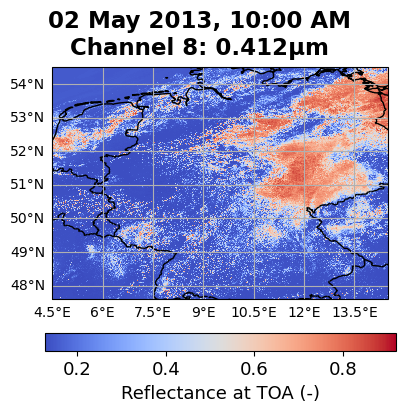

In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import plot_spectral_channels

# path_pred_netCDF = "../results/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
path_pred_netCDF = '/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc'
# path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20110401T2100_ref1-19_26_rad20-25_27_36.nc"
# results_output_path = "../results"
results_output_path = "/work/bb1036/b381362/output/results_emulator"

channel_list = [8]


plot_spectral_channels(path_pred_nc=path_pred_netCDF,
                         cmap='coolwarm',
                         channel_list=channel_list,
                         path_output=results_output_path)


## Plot all spectral channels

In [ ]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import plot_spectral_channels


path_pred_netCDF = "../results/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
results_output_path = "../results"
channel_list = None

compare_spectral_1_model(path_pred_nc=path_pred_netCDF,
                         cmap='coolwarm',
                         channel_list=channel_list,
                         path_output=results_output_path)


# Plot True color (RGB)

02 May 2013, 10:00 AM
 
 ------------- Plot True color (RGB) ------------- 
 --------------------- Image saved en: /work/bb1036/b381362/output/results_emulator/rgb_prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36_method_rgb_inverse_gamma.png


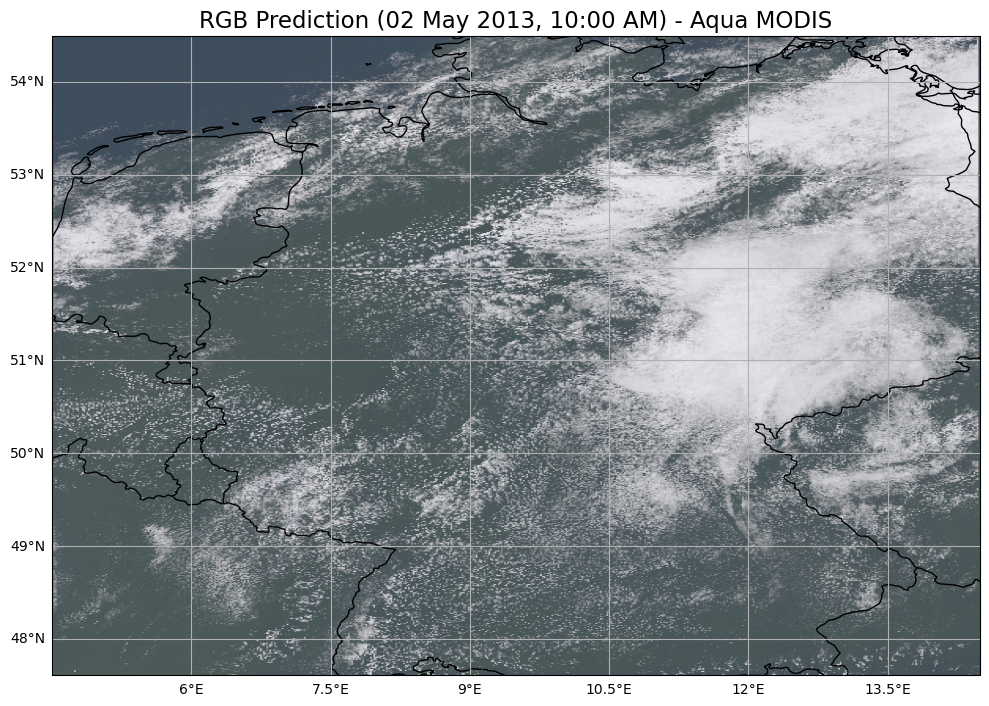

In [4]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import process_and_plot_rgb

# results_output_path = "../results"

path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
# path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20110401T2100_ref1-19_26_rad20-25_27_36.nc"
# results_output_path = "../results"
results_output_path = "/work/bb1036/b381362/output/results_emulator"

method_rgb = "inverse_gamma"
gamma_value = 2.2
process_and_plot_rgb(path=path_pred_netCDF,
                     indx_rgb=[0, 3, 2],
                     save_path=results_output_path,
                     method_rgb=method_rgb,
                     gamma_value=gamma_value)


2024-05-06 13:49:13.583645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
ERROR 1: PROJ: proj_create_from_database: Open of /sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/share/proj failed


02 May 2013, 10:00 AM
 
 ------------- Plot True color (RGB) ------------- 


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


 --------------------- Image saved en: /work/bb1036/b381362/output/results_emulator/rgb_prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36_method_rgb_histogram.png


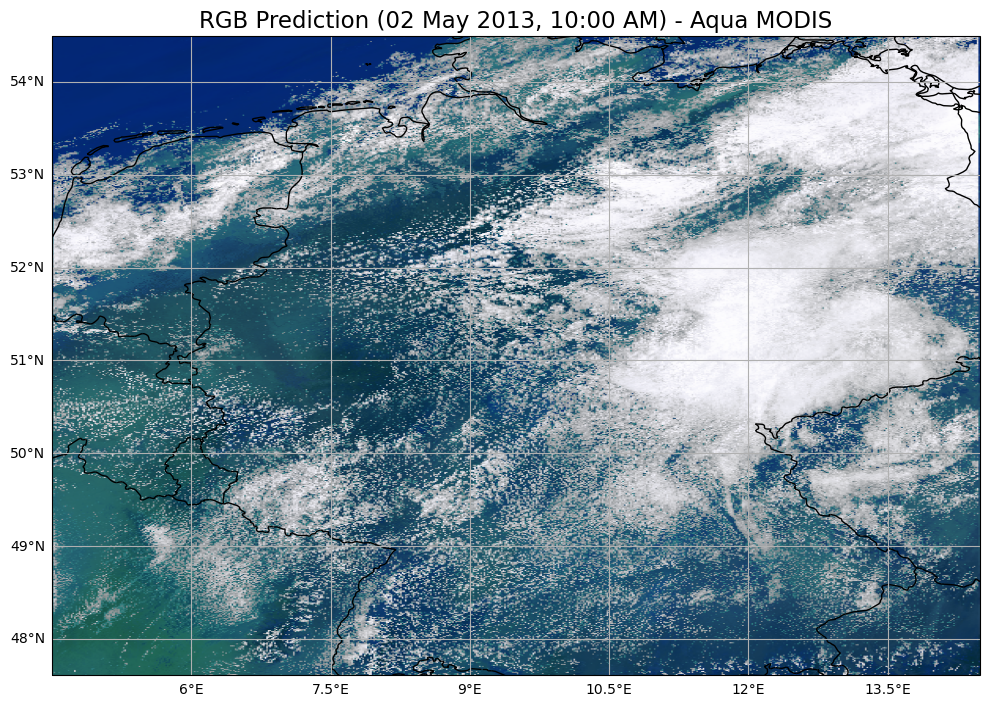

In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import process_and_plot_rgb

# results_output_path = "../results"

path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
# path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20110401T2100_ref1-19_26_rad20-25_27_36.nc"
# results_output_path = "../results"
results_output_path = "/work/bb1036/b381362/output/results_emulator"

method_rgb = "histogram"
process_and_plot_rgb(path=path_pred_netCDF,
                     indx_rgb=[0, 3, 2],
                     save_path=results_output_path,
                     method_rgb=method_rgb)


01 April 2011, 09:00 PM
 
 ------------- Plot True color (RGB) ------------- 


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


 --------------------- Image saved en: /work/bb1036/b381362/output/results_emulator/rgb_prediction_channels_NN_20110401T2100_ref1-19_26_rad20-25_27_36_method_rgb_histogram.png


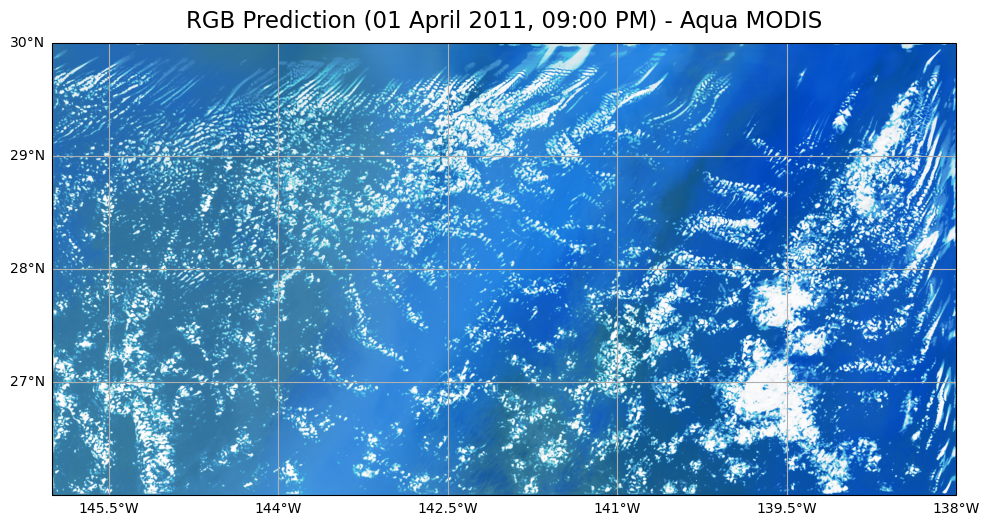

In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')

from get_prediction import process_and_plot_rgb

# path_pred_netCDF = "../results/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
# results_output_path = "../results"


path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20110401T2100_ref1-19_26_rad20-25_27_36.nc"
# path_pred_netCDF = "/work/bb1036/b381362/output/results_emulator/prediction_channels_NN_20130502T1000_ref1-19_26_rad20-25_27_36.nc"
# results_output_path = "../results"
results_output_path = "/work/bb1036/b381362/output/results_emulator"

# method_rgb = "contrast_stretch"
method_rgb = "histogram"
process_and_plot_rgb(path=path_pred_netCDF,
                     indx_rgb=[0, 3, 2],
                     save_path=results_output_path,
                     method_rgb=method_rgb)
